# Step 1: Import Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

# Step 2: Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Step 3: Dataset Understanding

In [3]:
print("Shape of the Dataset:", df.shape)
print("Column Names:", df.columns)
print("Check Null Values in a Dataset:", df.isnull().any())
print("Number of various crops: ", len(df['label'].unique()))
print("List of crops: ", df['label'].unique())
print(df['label'].value_counts())

Shape of the Dataset: (2200, 8)
Column Names: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Check Null Values in a Dataset: N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool
Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybea

In [4]:
summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# Step 4: Data Visualization and Data Analysis

## Nitrogen Analysis

In [5]:
summary_N = summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : summary_N['N'][0:10].sort_values().index,
    'x' : summary_N['N'][0:10].sort_values()
}

last = {
    'y' : summary_N['N'][-10:].index,
    'x' : summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Phosphorus Analysis

In [6]:
summary_P = summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : summary_P['P'][0:10].sort_values().index,
    'x' : summary_P['P'][0:10].sort_values()
}

last = {
    'y' : summary_P['P'][-10:].index,
    'x' : summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Potassium analysis

In [7]:
summary_K = summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : summary_K['K'][0:10].sort_values().index,
    'x' : summary_K['K'][0:10].sort_values()
}

last = {
    'y' : summary_K['K'][-10:].index,
    'x' : summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## N, P, K values comparision between crops

In [8]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=summary.index,
    y=summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=summary.index,
    y=summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=summary.index,
    y=summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

## NPK ratio for rice, cotton, jute, maize, lentil

In [9]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = summary[summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = summary[summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = summary[summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = summary[summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = summary[summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()

## NPK ratio for fruits

In [10]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[
         {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs)
cafe_colors =  ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

apple_npk = summary[summary.index=='apple']
values = [apple_npk['N'][0], apple_npk['P'][0], apple_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Apple", marker_colors=cafe_colors),1, 1)

banana_npk = summary[summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana", marker_colors=cafe_colors),1, 2)

grapes_npk = summary[summary.index=='grapes']
values = [grapes_npk['N'][0], grapes_npk['P'][0], grapes_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Grapes", marker_colors=cafe_colors),1, 3)

orange_npk = summary[summary.index=='orange']
values = [orange_npk['N'][0], orange_npk['P'][0], orange_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Orange", marker_colors=cafe_colors),1, 4)

mango_npk = summary[summary.index=='mango']
values = [mango_npk['N'][0], mango_npk['P'][0], mango_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Mango", marker_colors=cafe_colors),1, 5)

coconut_npk = summary[summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut", marker_colors=cafe_colors),2, 1)

papaya_npk = summary[summary.index=='papaya']
values = [papaya_npk['N'][0], papaya_npk['P'][0], papaya_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Papaya", marker_colors=cafe_colors),2, 2)

pomegranate_npk = summary[summary.index=='pomegranate']
values = [pomegranate_npk['N'][0], pomegranate_npk['P'][0], pomegranate_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Pomegranate", marker_colors=cafe_colors),2, 3)

watermelon_npk = summary[summary.index=='watermelon']
values = [watermelon_npk['N'][0], watermelon_npk['P'][0], watermelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Watermelon", marker_colors=cafe_colors),2, 4)

muskmelon_npk = summary[summary.index=='muskmelon']
values = [muskmelon_npk['N'][0], muskmelon_npk['P'][0], muskmelon_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Muskmelon", marker_colors=cafe_colors),2, 5)

fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=[dict(text='Apple',x=0.06,y=1.08, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.26,y=1.08, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.50,y=1.08, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.74,y=1.08, font_size=15, showarrow=False),
                dict(text='Mango',x=0.94,y=1.08, font_size=15, showarrow=False),
                dict(text='Coconut',x=0.06,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=0.26,y=0.46, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.50,y=0.46, font_size=15, showarrow=False),
                 dict(text='Watermelon',x=0.74,y=0.46, font_size=15, showarrow=False),
                dict(text='Muskmelon',x=0.94,y=0.46, font_size=15, showarrow=False)])
fig.show()

## Temperature and Humidity

In [11]:
crop_scatter = df[(df['label']=='rice') | 
                      (df['label']=='jute') | 
                      (df['label']=='cotton') |
                     (df['label']=='maize') |
                     (df['label']=='lentil')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Step 5: Data Preparation for Training

In [12]:
# Separate Independent and Dependent Variables
X = df.drop('label', axis=1)
y = df['label']

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

# Step 6: Random Forest Classifier

Random Forest accuracy score: 0.9955


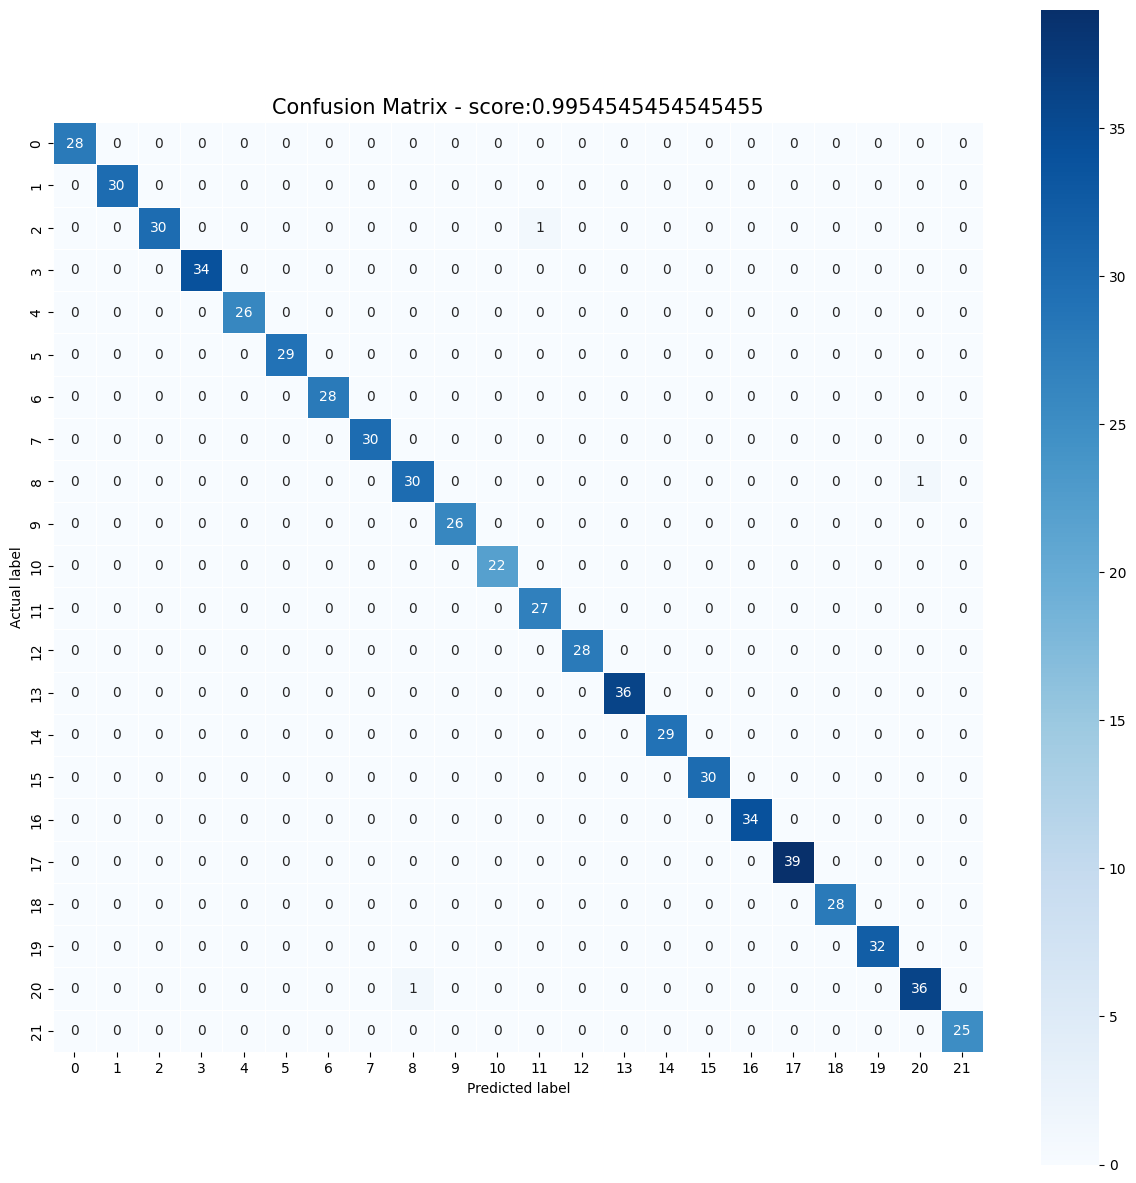

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.97      0.97      0.97        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier()

# Train the model on your training data
model.fit(X_train, y_train)

# Prediction
y_pred=model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Predict on New data
newdata=model.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
print(newdata)

# Other Classification Models

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
model = LogisticRegression()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
model = DecisionTreeClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Decision Trees accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Extra Trees (Extremely Randomized Trees)
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees model
model = ExtraTreesClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Extra Trees (Extremely Randomized Trees) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Support Vector Machines (SVM)
from sklearn.svm import SVC
# Create an SVM model
model = SVC()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Support Vector Machines (SVM) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN model
model = KNeighborsClassifier()
# Train the model on your training data
model.fit(X_train, y_train)


# Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
# Create an MLP model
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Multi-layer Perceptron (MLP) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes model (Gaussian Naive Bayes)
model = GaussianNB()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting model
model = GradientBoostingClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Gradient Boosting Machines (GBM) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost model
model = AdaBoostClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('AdaBoost accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Quadratic Discriminant Analysis (QDA)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Create a QDA model
model = QuadraticDiscriminantAnalysis()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Quadratic Discriminant Analysis (QDA) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Stochastic Gradient Descent (SGD) Classifier
from sklearn.linear_model import SGDClassifier
# Create an SGD Classifier model
model = SGDClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Stochastic Gradient Descent (SGD) Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Categorical Naive Bayes
from sklearn.naive_bayes import CategoricalNB
# Create a Categorical Naive Bayes model
model = CategoricalNB()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Categorical Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
# Create a Ridge Classifier model
model = RidgeClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Ridge Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
# Create a Passive Aggressive Classifier model
model = PassiveAggressiveClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Passive Aggressive Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Create a Multinomial Naive Bayes model
model = MultinomialNB()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Multinomial Naive Bayes accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Quadratic Support Vector Machine (SVM)
from sklearn.svm import SVC
# Create a Quadratic SVM model
model = SVC(kernel='poly', degree=2)
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Quadratic Support Vector Machine (SVM) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Ridge Classifier with Stochastic Average Gradient (SAG)
from sklearn.linear_model import RidgeClassifierCV
# Create a Ridge Classifier with SAG model
model = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Ridge Classifier with Stochastic Average Gradient (SAG) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


#  Perceptron
from sklearn.linear_model import Perceptron
# Create a Perceptron model
model = Perceptron()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Perceptron accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an LDA model
model = LinearDiscriminantAnalysis()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Linear Discriminant Analysis (LDA) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# L1 Regularized Logistic Regression (Lasso)
from sklearn.linear_model import LogisticRegression
# Create a L1 Regularized Logistic Regression model (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear')
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('L1 Regularized Logistic Regression (Lasso) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# L2 Regularized Logistic Regression (Ridge)
from sklearn.linear_model import LogisticRegression
# Create a L2 Regularized Logistic Regression model (Ridge)
model = LogisticRegression(penalty='l2')
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('L2 Regularized Logistic Regression (Ridge) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# LDA with Shrinkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an LDA model with shrinkage
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LDA with Shrinkage accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# LightGBM
import lightgbm as lgb
# Create a lightGBM Model
model = lgb.LGBMClassifier()
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Multilayer Perceptron (MLP) with Custom Architecture
from sklearn.neural_network import MLPClassifier
# Create a custom MLP model with hidden layers
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000)
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Multilayer Perceptron (MLP) with Custom Architecture accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# L1 Regularized SVM (LinearSVC with L1 penalty)
from sklearn.svm import LinearSVC
# Create a Linear SVM model with L1 regularization
model = LinearSVC(penalty='l1', dual=False)
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('L1 Regularized SVM (LinearSVC with L1 penalty) accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# Passive Aggressive Classifier with Custom Loss Function
from sklearn.linear_model import PassiveAggressiveClassifier
# Create a Passive Aggressive Classifier model with custom loss function
model = PassiveAggressiveClassifier(loss='squared_hinge')
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Passive Aggressive Classifier with Custom Loss Function accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))


# CatBoost
from catboost import CatBoostClassifier
# Create a CatBoost model
model = CatBoostClassifier(verbose=False)
# Train the model on your training data
model.fit(X_train, y_train)
# Prediction
y_pred=model.predict(X_test)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('CatBoost accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score: 0.9500
Decision Trees accuracy score: 0.9833
Extra Trees (Extremely Randomized Trees) accuracy score: 0.9970
Support Vector Machines (SVM) accuracy score: 0.9727
Multi-layer Perceptron (MLP) accuracy score: 0.9621
Naive Bayes accuracy score: 0.9939
Gradient Boosting Machines (GBM) accuracy score: 0.9864
AdaBoost accuracy score: 0.2121
Quadratic Discriminant Analysis (QDA) accuracy score: 0.9909
Stochastic Gradient Descent (SGD) Classifier accuracy score: 0.6470
Categorical Naive Bayes accuracy score: 0.9364
Ridge Classifier accuracy score: 0.7197
Passive Aggressive Classifier accuracy score: 0.7591
Multinomial Naive Bayes accuracy score: 0.8924
Quadratic Support Vector Machine (SVM) accuracy score: 0.9803
Ridge Classifier with Stochastic Average Gradient (SAG) accuracy score: 0.7197
Perceptron accuracy score: 0.5909
Linear Discriminant Analysis (LDA) accuracy score: 0.9636
L1 Regularized Logistic Regression (Lasso) accuracy score: 0.9545
L2 Regulariz